In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df_covid = pd.read_csv("covid.csv", encoding='ISO-8859-1')
df_covid.head(1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [58]:
df_vaccinations = pd.read_csv("country_vaccinations.csv", encoding='ISO-8859-1')
df_vaccinations.head(1)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [59]:
#Read csv file and select date ,total_death and population columns 
df_covid = pd.read_csv("covid.csv", encoding='ISO-8859-1')
df_covid = df_covid[['date','total_deaths']]
df_covid = df_covid.dropna(subset=['total_deaths'])
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.head(10)

,date,total_deaths
84,2020-03-29,2.0
85,2020-03-30,2.0
86,2020-03-31,2.0
87,2020-04-01,2.0
88,2020-04-02,2.0
89,2020-04-03,2.0
90,2020-04-04,2.0
91,2020-04-05,5.0
92,2020-04-06,5.0
93,2020-04-07,5.0


In [60]:
# Obtain information  of total vaccinations from csv 
df_vaccinations = pd.read_csv("country_vaccinations.csv", encoding='ISO-8859-1')
df_vaccinations.head()
df_vaccinations = df_vaccinations[['date','total_vaccinations']]
df_vaccinations = df_vaccinations.dropna(subset=['total_vaccinations'])
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])
df_vaccinations.tail(10)

,date,total_vaccinations
86502,2022-03-20,8210637.0
86503,2022-03-21,8230061.0
86504,2022-03-22,8313471.0
86505,2022-03-23,8414477.0
86506,2022-03-24,8552429.0
86507,2022-03-25,8691642.0
86508,2022-03-26,8791728.0
86509,2022-03-27,8845039.0
86510,2022-03-28,8934360.0
86511,2022-03-29,9039729.0


In [61]:
# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(df_vaccinations, df_covid, on='date', how='inner')
print(merged_df.tail(20))

# Drop rows with NaN values in any column
merged_df = merged_df.dropna(how='any')

# Remove rows where 'total_vaccinations' or 'total_deaths' are 0
merged_df = merged_df[(merged_df['total_vaccinations'] != 0) & (merged_df['total_deaths'] != 0)]

# Check relevant columns again for correlation
correlation = merged_df[['total_vaccinations', 'total_deaths']].corr()
print(correlation)





              date  total_vaccinations  total_deaths
9650257 2022-03-29           9039729.0        3729.0
9650258 2022-03-29           9039729.0       28165.0
9650259 2022-03-29           9039729.0       97711.0
9650260 2022-03-29           9039729.0          36.0
9650261 2022-03-29           9039729.0        3596.0
9650262 2022-03-29           9039729.0      105297.0
9650263 2022-03-29           9039729.0        2302.0
9650264 2022-03-29           9039729.0      191138.0
9650265 2022-03-29           9039729.0      973682.0
9650266 2022-03-29           9039729.0         110.0
9650267 2022-03-29           9039729.0     2419904.0
9650268 2022-03-29           9039729.0        7149.0
9650269 2022-03-29           9039729.0        1016.0
9650270 2022-03-29           9039729.0        5674.0
9650271 2022-03-29           9039729.0       42306.0
9650272 2022-03-29           9039729.0           7.0
9650273 2022-03-29           9039729.0     6172540.0
9650274 2022-03-29           9039729.0        

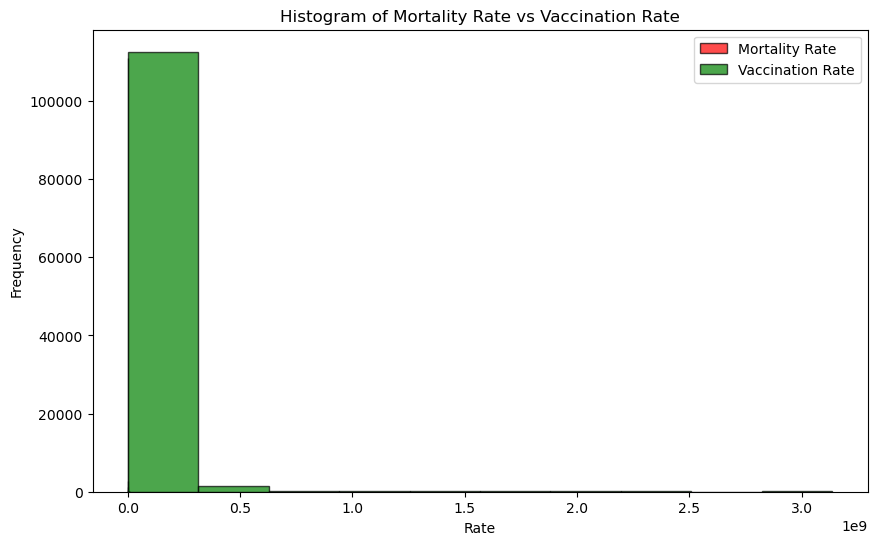

In [62]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])
df_sorted = merged_df.sort_values(by='date')

# Filter the DataFrame to only include the specific dates
selected_dates = pd.to_datetime(['2021-01-01', '2021-03-01', '2021-07-01', '2021-09-01', '2021-11-01', '2022-03-01'])
filtered_df = df_sorted[df_sorted['date'].isin(selected_dates)]

# Plotting histograms for Mortality Rate and Vaccination Rate
plt.figure(figsize=(10, 6))

# Plot Mortality Rate histogram
plt.hist(filtered_df['total_deaths'], bins=10, alpha=0.7, label='Mortality Rate', color='red', edgecolor='black')

# Plot Vaccination Rate histogram
plt.hist(filtered_df['total_vaccinations'], bins=10, alpha=0.7, label='Vaccination Rate', color='green', edgecolor='black')

plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Mortality Rate vs Vaccination Rate')
plt.legend()
plt.show()

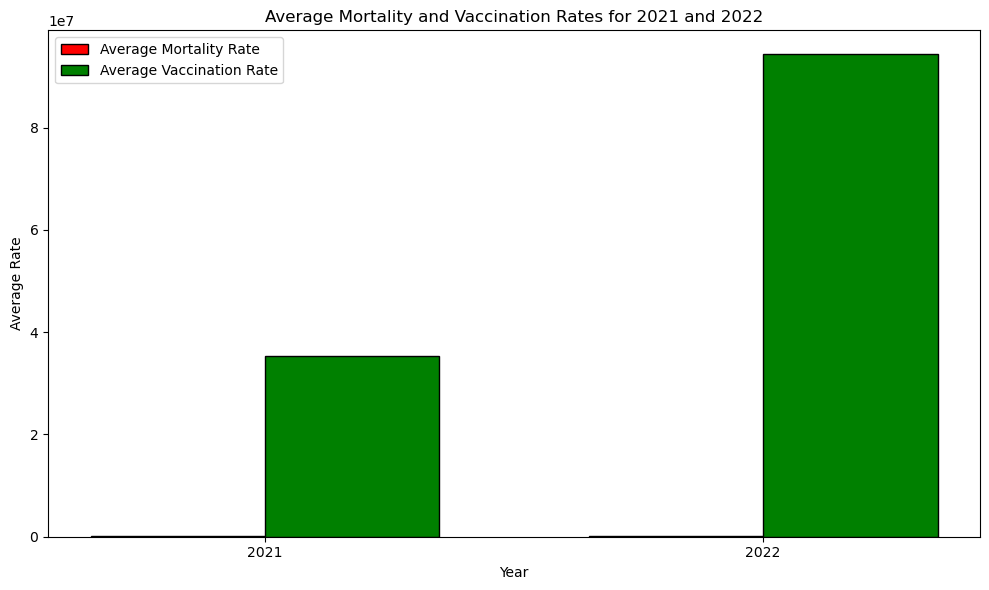

In [63]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter data for the years 2021 and 2022
merged_df['year'] = merged_df['date'].dt.year

# Filter for the specific years (2021 and 2022)
df_2021 = merged_df[merged_df['year'] == 2021]
df_2022 = merged_df[merged_df['year'] == 2022]

# Calculate the average of total_deaths and total_vaccinations for both years
avg_deaths_2021 = df_2021['total_deaths'].mean()
avg_vaccinations_2021 = df_2021['total_vaccinations'].mean()

avg_deaths_2022 = df_2022['total_deaths'].mean()
avg_vaccinations_2022 = df_2022['total_vaccinations'].mean()

# Prepare the data for plotting
years = ['2021', '2022']
deaths = [avg_deaths_2021, avg_deaths_2022]
vaccinations = [avg_vaccinations_2021, avg_vaccinations_2022]

# Plotting the averages in a bar chart
bar_width = 0.35
index = range(len(years))

plt.figure(figsize=(10, 6))

# Plot average death rate as bars
plt.bar(index, deaths, width=bar_width, label='Average Mortality Rate', color='red', edgecolor='black')

# Plot average vaccination rate as bars (shifted to the right)
plt.bar([i + bar_width for i in index], vaccinations, width=bar_width, label='Average Vaccination Rate', color='green', edgecolor='black')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Rate')
plt.title('Average Mortality and Vaccination Rates for 2021 and 2022')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()
plt.tight_layout()
plt.show()

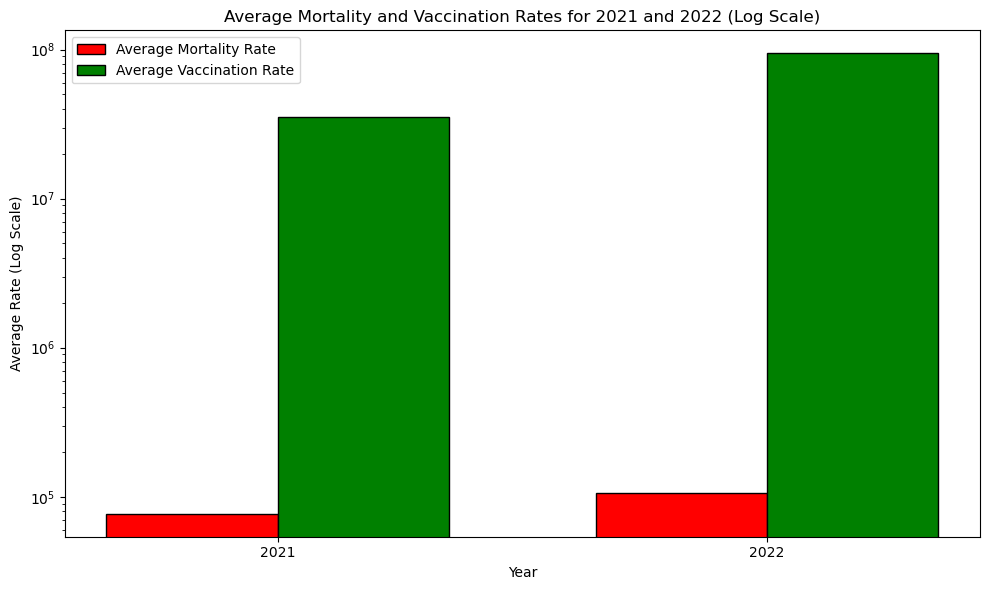

In [64]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter data for the years 2021 and 2022
merged_df['year'] = merged_df['date'].dt.year

# Filter for the specific years (2021 and 2022)
df_2021 = merged_df[merged_df['year'] == 2021]
df_2022 = merged_df[merged_df['year'] == 2022]

# Calculate the average of total_deaths and total_vaccinations for both years
avg_deaths_2021 = df_2021['total_deaths'].mean()
avg_vaccinations_2021 = df_2021['total_vaccinations'].mean()

avg_deaths_2022 = df_2022['total_deaths'].mean()
avg_vaccinations_2022 = df_2022['total_vaccinations'].mean()

# Prepare the data for plotting
years = ['2021', '2022']
deaths = [avg_deaths_2021, avg_deaths_2022]
vaccinations = [avg_vaccinations_2021, avg_vaccinations_2022]

# Plotting the averages in a bar chart
bar_width = 0.35
index = range(len(years))

plt.figure(figsize=(10, 6))

# Plot average death rate as bars
plt.bar(index, deaths, width=bar_width, label='Average Mortality Rate', color='red', edgecolor='black')

# Plot average vaccination rate as bars (shifted to the right)
plt.bar([i + bar_width for i in index], vaccinations, width=bar_width, label='Average Vaccination Rate', color='green', edgecolor='black')

# Set y-axis to log scale to better visualize both data sets
plt.yscale('log')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Rate (Log Scale)')
plt.title('Average Mortality and Vaccination Rates for 2021 and 2022 (Log Scale)')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()
plt.tight_layout()
plt.show()

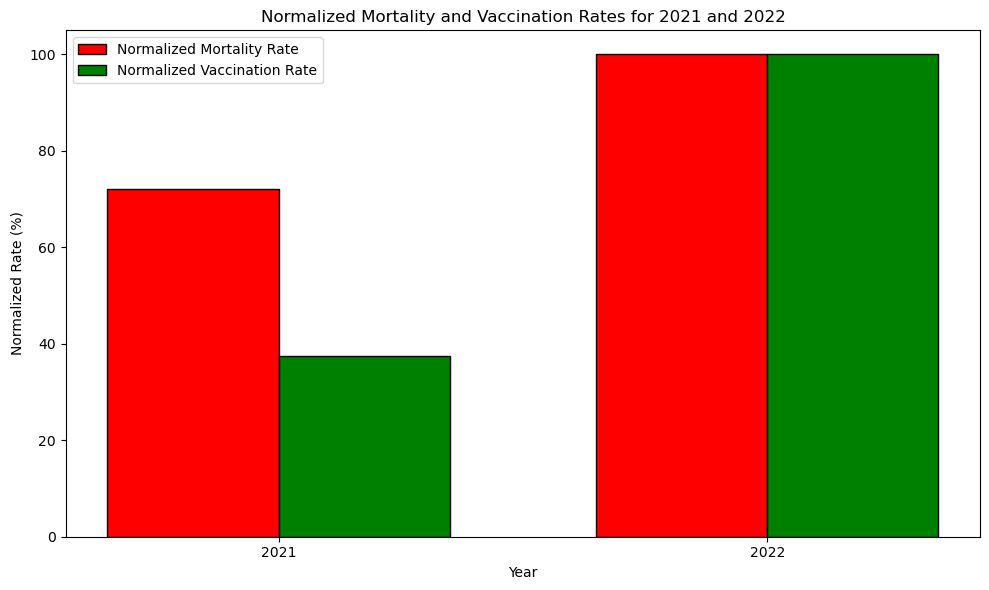

In [65]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter data for the years 2021 and 2022
merged_df['year'] = merged_df['date'].dt.year

# Filter for the specific years (2021 and 2022)
df_2021 = merged_df[merged_df['year'] == 2021]
df_2022 = merged_df[merged_df['year'] == 2022]

# Calculate the average of total_deaths and total_vaccinations for both years
avg_deaths_2021 = df_2021['total_deaths'].mean()
avg_vaccinations_2021 = df_2021['total_vaccinations'].mean()

avg_deaths_2022 = df_2022['total_deaths'].mean()
avg_vaccinations_2022 = df_2022['total_vaccinations'].mean()

# Normalize the data (rescale)
max_deaths = max(avg_deaths_2021, avg_deaths_2022)
max_vaccinations = max(avg_vaccinations_2021, avg_vaccinations_2022)

normalized_deaths_2021 = avg_deaths_2021 / max_deaths * 100  # Rescale to percentage
normalized_vaccinations_2021 = avg_vaccinations_2021 / max_vaccinations * 100

normalized_deaths_2022 = avg_deaths_2022 / max_deaths * 100
normalized_vaccinations_2022 = avg_vaccinations_2022 / max_vaccinations * 100

# Prepare the data for plotting
years = ['2021', '2022']
normalized_deaths = [normalized_deaths_2021, normalized_deaths_2022]
normalized_vaccinations = [normalized_vaccinations_2021, normalized_vaccinations_2022]

# Plotting the averages in a bar chart
bar_width = 0.35
index = range(len(years))

plt.figure(figsize=(10, 6))

# Plot normalized death rate as bars
plt.bar(index, normalized_deaths, width=bar_width, label='Normalized Mortality Rate', color='red', edgecolor='black')

# Plot normalized vaccination rate as bars (shifted to the right)
plt.bar([i + bar_width for i in index], normalized_vaccinations, width=bar_width, label='Normalized Vaccination Rate', color='green', edgecolor='black')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Normalized Rate (%)')
plt.title('Normalized Mortality and Vaccination Rates for 2021 and 2022')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
print(filtered_df)  # Print the entire filtered DataFrame to see the rows


              date  total_vaccinations  total_deaths
2189103 2021-01-01             33679.0          63.0
2189102 2021-01-01             33679.0           2.0
2189075 2021-01-01             33679.0          47.0
2189076 2021-01-01             33679.0      330452.0
2189072 2021-01-01             33679.0           5.0
...            ...                 ...           ...
3178883 2022-03-01         170152138.0         722.0
3178823 2022-03-01         170152138.0          28.0
3178882 2022-03-01         170152138.0         297.0
3178888 2022-03-01         170152138.0         187.0
3178881 2022-03-01         170152138.0       32674.0

[115765 rows x 3 columns]


2189103   2021-01-01
2189102   2021-01-01
2189075   2021-01-01
2189076   2021-01-01
2189072   2021-01-01
             ...    
3178883   2022-03-01
3178823   2022-03-01
3178882   2022-03-01
3178888   2022-03-01
3178881   2022-03-01
Name: date, Length: 115765, dtype: datetime64[ns]


/var/folders/qx/wdt486c517n4vrrtq8dnsww40000gn/T/ipykernel_36896/846598955.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


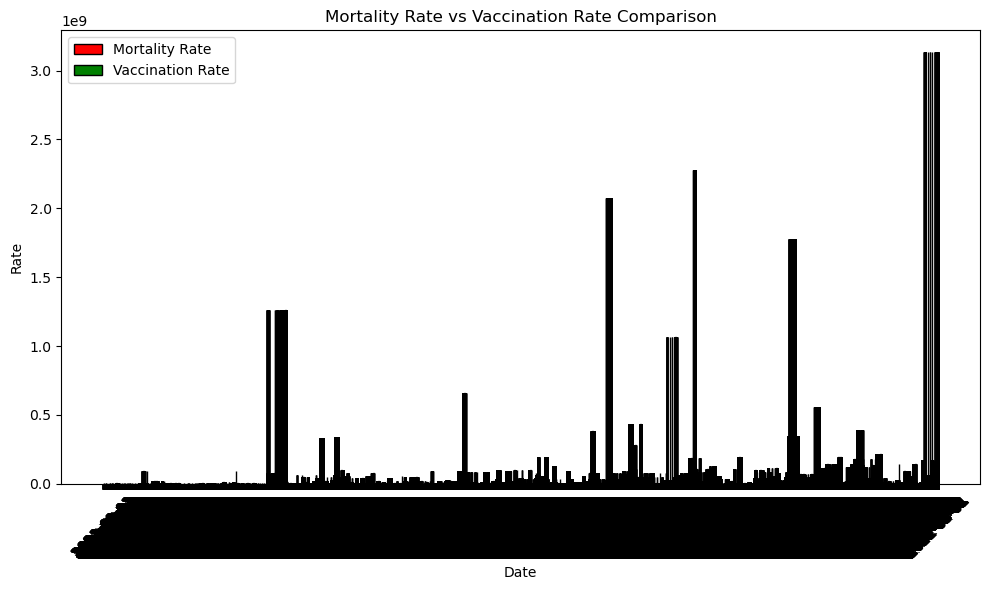

In [67]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort the DataFrame by 'date'
df_sorted = merged_df.sort_values(by='date')

# Specify the selected dates explicitly as 'datetime' objects
selected_dates = pd.to_datetime(['2021-01-01', '2021-03-01', '2021-07-01', '2021-09-01', '2021-11-01', '2022-03-01'])

# Filter the DataFrame to only include rows that match the selected dates
filtered_df = df_sorted[df_sorted['date'].isin(selected_dates)]

# Check if filtered_df contains only the selected dates
print(filtered_df['date'])

# Set the bar width for side-by-side bars
bar_width = 0.35
index = range(len(filtered_df))  # This creates a sequential list of indices for positioning the bars

# Plotting side-by-side histograms for Mortality Rate and Vaccination Rate
plt.figure(figsize=(10, 6))

# Plot Mortality Rate histogram (shifted to the left)
plt.bar(index, filtered_df['total_deaths'], width=bar_width, label='Mortality Rate', color='red', edgecolor='black')

# Plot Vaccination Rate histogram (shifted to the right)
plt.bar([i + bar_width for i in index], filtered_df['total_vaccinations'], width=bar_width, label='Vaccination Rate', color='green', edgecolor='black')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Mortality Rate vs Vaccination Rate Comparison')

# Set x-ticks to show the selected dates
plt.xticks([i + bar_width / 2 for i in index], filtered_df['date'].dt.strftime('%Y-%m-%d'), rotation=45)

# Add a legend to the plot
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/qx/wdt486c517n4vrrtq8dnsww40000gn/T/ipykernel_36896/3882810918.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


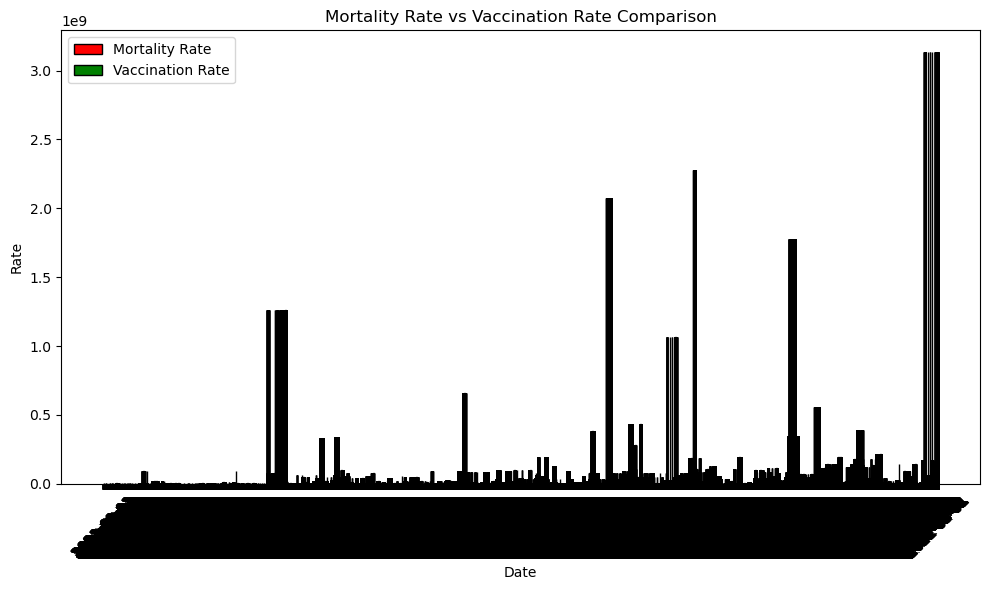

In [68]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])
df_sorted = merged_df.sort_values(by='date')

# Filter the DataFrame to only include the specific dates
selected_dates = pd.to_datetime(['2021-01-01', '2021-03-01', '2021-07-01', '2021-09-01', '2021-11-01', '2022-03-01'])
filtered_df = df_sorted[df_sorted['date'].isin(selected_dates)]

# Set the bar width for side-by-side bars
bar_width = 0.35
index = range(len(filtered_df))  # This creates a sequential list of indices for positioning the bars

# Plotting side-by-side histograms for Mortality Rate and Vaccination Rate
plt.figure(figsize=(10, 6))

# Plot Mortality Rate histogram (shifted to the left)
plt.bar(index, filtered_df['total_deaths'], width=bar_width, label='Mortality Rate', color='red', edgecolor='black')

# Plot Vaccination Rate histogram (shifted to the right)
plt.bar([i + bar_width for i in index], filtered_df['total_vaccinations'], width=bar_width, label='Vaccination Rate', color='green', edgecolor='black')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Mortality Rate vs Vaccination Rate Comparison')

# Set x-ticks to show the selected dates
plt.xticks([i + bar_width / 2 for i in index], filtered_df['date'].dt.strftime('%Y-%m-%d'), rotation=45)

# Add a legend to the plot
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/qx/wdt486c517n4vrrtq8dnsww40000gn/T/ipykernel_36896/2914851178.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


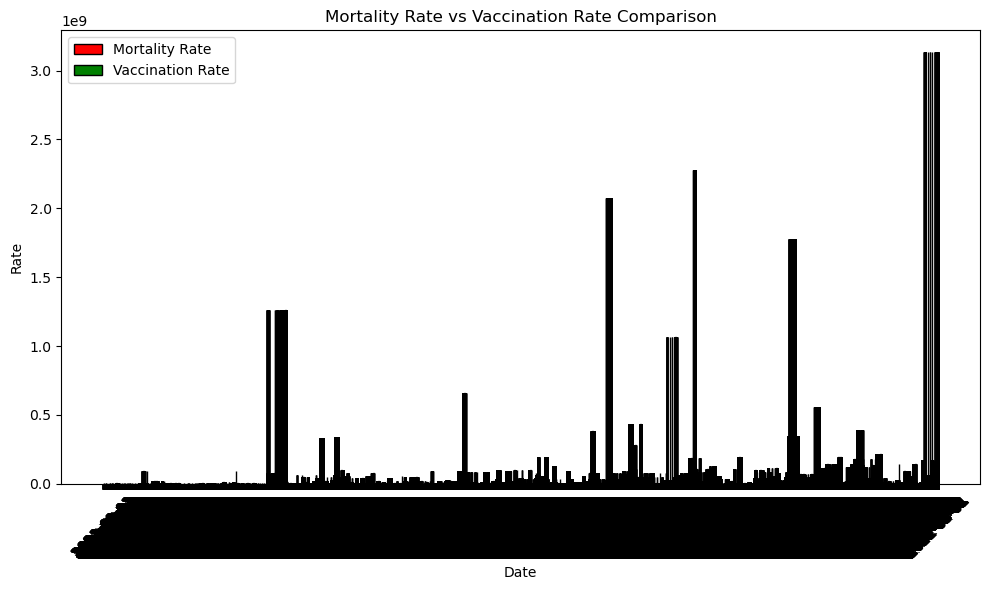

In [69]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])
df_sorted = merged_df.sort_values(by='date')

# Filter the DataFrame to only include the specific dates
selected_dates = pd.to_datetime(['2021-01-01', '2021-03-01', '2021-07-01', '2021-09-01', '2021-11-01', '2022-03-01'])
filtered_df = df_sorted[df_sorted['date'].isin(selected_dates)]

# Set the bar width for side-by-side bars
bar_width = 0.35
index = range(len(filtered_df))  # This creates a sequential list of indices for positioning the bars

# Plotting side-by-side histograms for Mortality Rate and Vaccination Rate
plt.figure(figsize=(10, 6))

# Plot Mortality Rate histogram (shifted to the left)
plt.bar(index, filtered_df['total_deaths'], width=bar_width, label='Mortality Rate', color='red', edgecolor='black')

# Plot Vaccination Rate histogram (shifted to the right)
plt.bar([i + bar_width for i in index], filtered_df['total_vaccinations'], width=bar_width, label='Vaccination Rate', color='green', edgecolor='black')

plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Mortality Rate vs Vaccination Rate Comparison')
plt.xticks([i + bar_width / 2 for i in index], filtered_df['date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

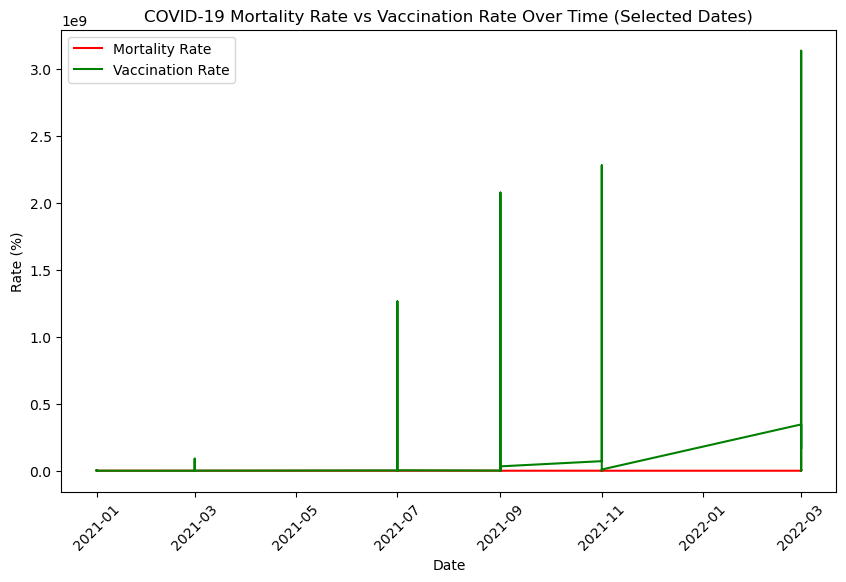

In [70]:
# Assuming merged_df is already defined
merged_df['date'] = pd.to_datetime(merged_df['date'])
df_sorted = merged_df.sort_values(by='date')

# Filter the DataFrame to only include the specific dates
selected_dates = pd.to_datetime(['2021-01-01', '2021-03-01', '2021-07-01', '2021-09-01', '2021-11-01', '2022-03-01'])
filtered_df = df_sorted[df_sorted['date'].isin(selected_dates)]

# Plot mortality rate and vaccination rate over the selected dates
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['total_deaths'], label='Mortality Rate', color='red')
plt.plot(filtered_df['date'], filtered_df['total_vaccinations'], label='Vaccination Rate', color='green')

plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('COVID-19 Mortality Rate vs Vaccination Rate Over Time (Selected Dates)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


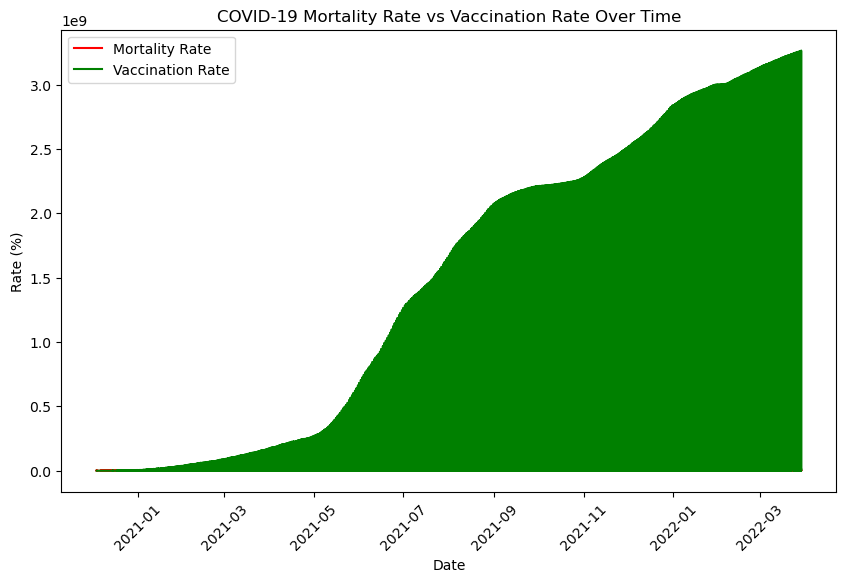

In [71]:
# Ensure you have a "date", "total_vaccination" and "total_deaths" 
merged_df['date'] = pd.to_datetime(merged_df['date'])
df_sorted = merged_df.sort_values(by='date')

# Plot mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['date'], df_sorted['total_deaths'], label='Mortality Rate', color='red')
plt.plot(df_sorted['date'], df_sorted['total_vaccinations'], label='Vaccination Rate', color='green')

plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('COVID-19 Mortality Rate vs Vaccination Rate Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

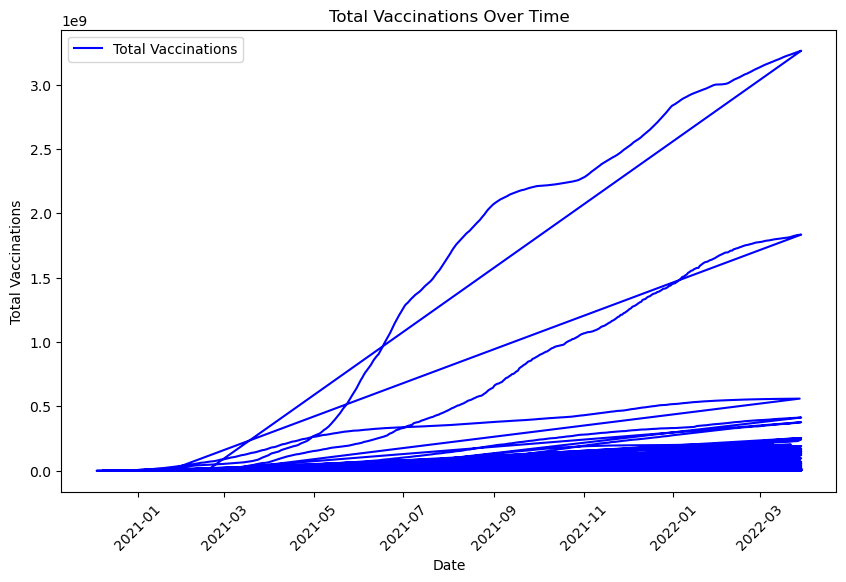

In [72]:
# Plot total vaccinations over Time
plt.figure(figsize=(10,6))

# Plotting total vaccinations over time
plt.plot(merged_df['date'], merged_df['total_vaccinations'], label='Total Vaccinations', color='blue')

plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

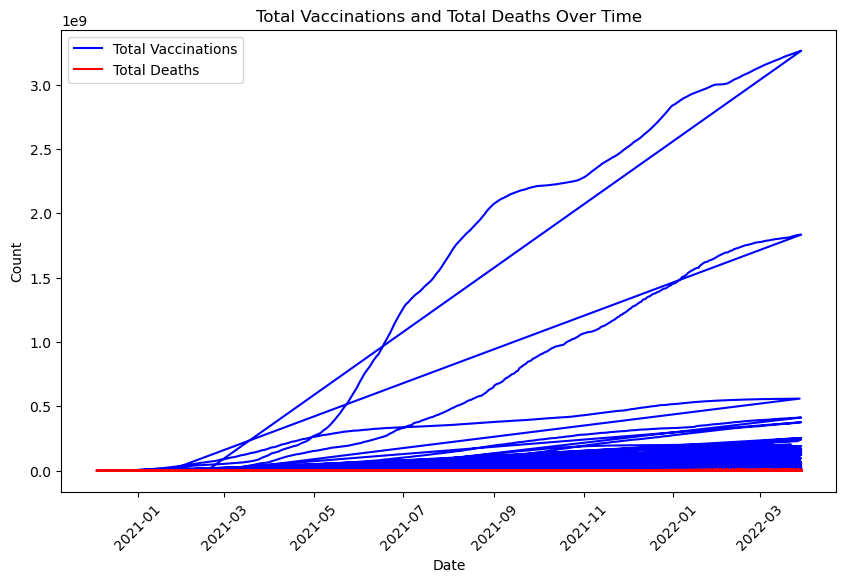

In [73]:
# Did the vaccine actually help prevent deaths?
# Find the relation between mortality and vaccination in time 
# Plot the relationship between total vaccinations and total deaths over Time
plt.figure(figsize=(10,6))

# Plotting total vaccinations over time
plt.plot(merged_df['date'], merged_df['total_vaccinations'], label='Total Vaccinations', color='blue')

# Plotting total deaths over time
plt.plot(merged_df['date'], merged_df['total_deaths'], label='Total Deaths', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Vaccinations and Total Deaths Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

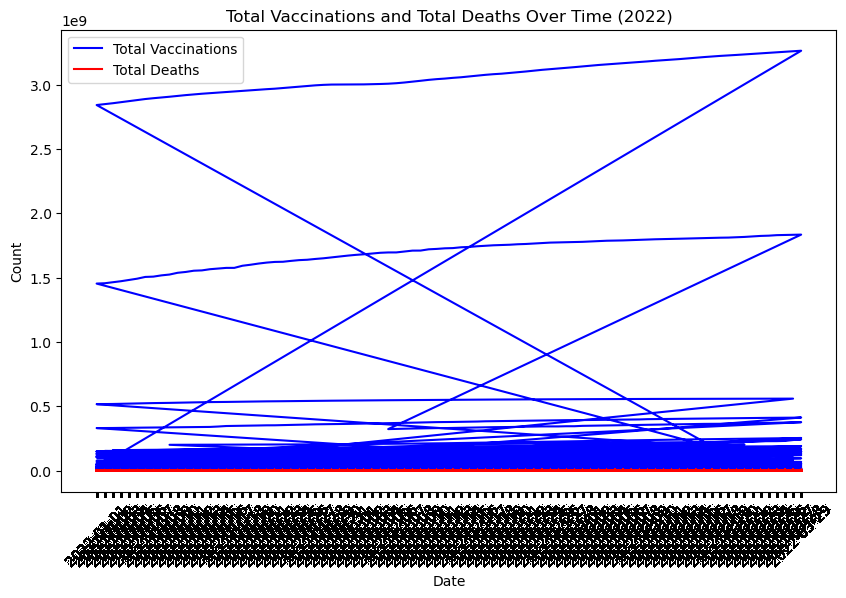

In [74]:
# Convert 'date' column to datetime format if it's not already
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter data for the year 2022
df_2022 = merged_df[merged_df['date'].dt.year == 2022]

# Plot the relationship between total vaccinations and total deaths for 2022
plt.figure(figsize=(10,6))

# Plotting total vaccinations over time for 2022
plt.plot(df_2022['date'], df_2022['total_vaccinations'], label='Total Vaccinations', color='blue')

# Plotting total deaths over time for 2022
plt.plot(df_2022['date'], df_2022['total_deaths'], label='Total Deaths', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Vaccinations and Total Deaths Over Time (2022)')
plt.legend()

# Rotate x-axis labels for better readability (monthly intervals)
plt.xticks(df_2022['date'][::30], rotation=45)  # Show a label every 30 days or as needed

plt.show()

In [75]:
# Define vaccination thresholds
low_vax = merged_df[merged_df['total_vaccinations'] < 50]
medium_vax = merged_df[(merged_df['total_vaccinations'] >= 50) & (merged_df['total_vaccinations'] < 80)]
high_vax = merged_df[merged_df['total_vaccinations'] >= 80]

# Calculate mean mortality rates
low_mortality = low_vax['total_deaths'].mean()
medium_mortality = medium_vax['total_deaths'].mean()
high_mortality = high_vax['total_deaths'].mean()

print(f"Low Vaccination Mortality Rate: {low_mortality}")
print(f"Medium Vaccination Mortality Rate: {medium_mortality}")
print(f"High Vaccination Mortality Rate: {high_mortality}")

Low Vaccination Mortality Rate: 41081.74669112829
Medium Vaccination Mortality Rate: 45644.12865895167
High Vaccination Mortality Rate: 82666.5881127838


/var/folders/qx/wdt486c517n4vrrtq8dnsww40000gn/T/ipykernel_36896/2582105578.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = merged_df.resample('6M').sum()


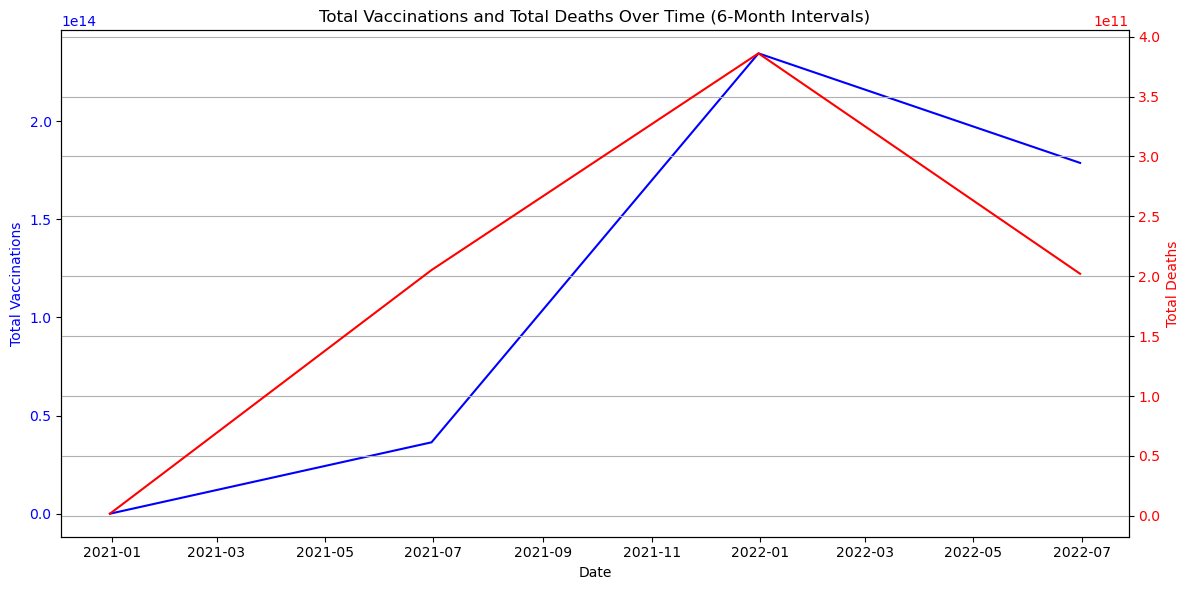

In [76]:
#Observing the relation between death and vaccinations with specific plots
# Assuming merged_df has already been created after merging df_vaccinations and df_covid
merged_df.set_index('date', inplace=True)

# Resample the data every 6 months, aggregating using sum for 'total_vaccinations' and 'total_deaths'
resampled_df = merged_df.resample('6M').sum()

# Plotting the resampled data with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Vaccinations on primary y-axis (left)
ax1.plot(resampled_df.index, resampled_df['total_vaccinations'], label='Total Vaccinations', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Vaccinations', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Total Deaths (right)
ax2 = ax1.twinx()
ax2.plot(resampled_df.index, resampled_df['total_deaths'], label='Total Deaths', color='red')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Total Vaccinations and Total Deaths Over Time (6-Month Intervals)')
plt.xticks(rotation=45)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True)

# Show the plot
plt.show()

To answer the question "Did the vaccine actually help prevent deaths?" using the data, and then present the findings in a PDF format, you'll want to take a systematic approach to analyze the data, visualize key insights, and then export the results.

Here's how you can do this step-by-step:
1. Analyze the data
Key insights to analyze:

Total number of vaccinations and total number of deaths over time.
Compare mortality rate before and after vaccination campaigns.
Rate of change in deaths compared to vaccination rates.
You can compute:

Cumulative deaths and vaccinations over time.
Mortality rate as a function of vaccinations to see if the rate of deaths decreased after vaccination efforts.

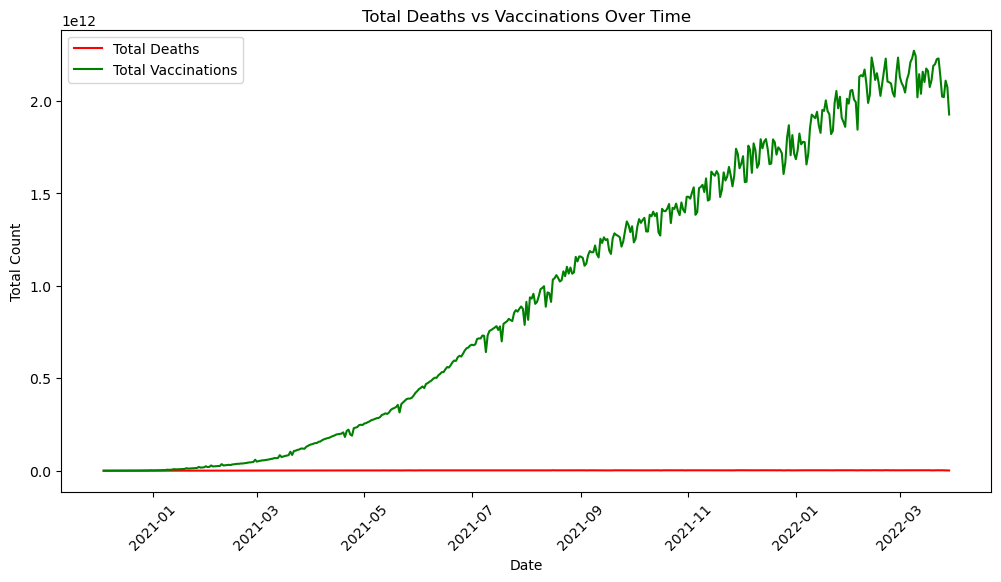

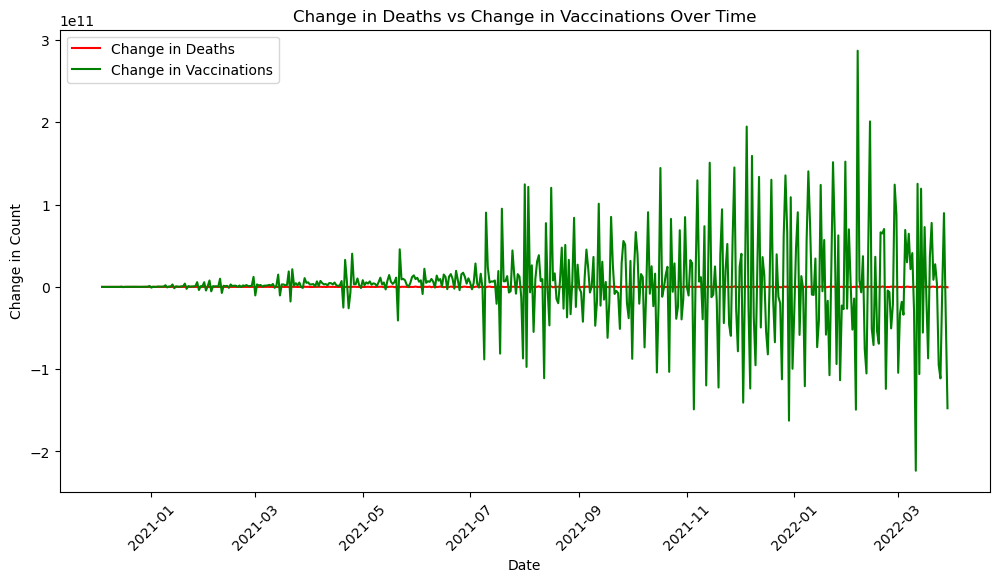

          date  total_vaccinations  total_deaths  mortality_rate
469 2022-03-20        2.190635e+12  2.044247e+09        0.093318
470 2022-03-21        2.199308e+12  2.376437e+09        0.108054
471 2022-03-22        2.226836e+12  2.274224e+09        0.102128
472 2022-03-23        2.230700e+12  2.529755e+09        0.113406
473 2022-03-24        2.135922e+12  2.044247e+09        0.095708
474 2022-03-25        2.024752e+12  2.504202e+09        0.123679
475 2022-03-26        2.020750e+12  1.839822e+09        0.091046
476 2022-03-27        2.110426e+12  1.776520e+09        0.084178
477 2022-03-28        2.074851e+12  1.776520e+09        0.085622
478 2022-03-29        1.927354e+12  1.338827e+09        0.069465


In [84]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming merged_df is already loaded and cleaned

# Convert 'date' column to datetime format
#merged_df['date'] = pd.to_datetime(merged_df['date'])

# Group the data by date and sum up vaccinations and deaths for each day
daily_data = merged_df.groupby('date').agg({'total_vaccinations': 'sum', 'total_deaths': 'sum'}).reset_index()

# Create a new column for the mortality rate (deaths per total vaccinations)
daily_data['mortality_rate'] = (daily_data['total_deaths'] / daily_data['total_vaccinations']) * 100

# Create a simple line plot for visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['total_deaths'], label='Total Deaths', color='red')
plt.plot(daily_data['date'], daily_data['total_vaccinations'], label='Total Vaccinations', color='green')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Deaths vs Vaccinations Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
# Save the plot to a PDF
with PdfPages('vaccination_vs_deaths_analysis.pdf') as pdf:
    plt.tight_layout()
    pdf.savefig()  # saves the current figure into the pdf
    plt.close()

# Calculate the rate of change (e.g., difference between consecutive days) in vaccinations and deaths
daily_data['vaccination_change'] = daily_data['total_vaccinations'].diff().fillna(0)
daily_data['death_change'] = daily_data['total_deaths'].diff().fillna(0)

# Plot these changes over time to examine trends
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['death_change'], label='Change in Deaths', color='red')
plt.plot(daily_data['date'], daily_data['vaccination_change'], label='Change in Vaccinations', color='green')
plt.xlabel('Date')
plt.ylabel('Change in Count')
plt.title('Change in Deaths vs Change in Vaccinations Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Save the second plot to the same PDF
with PdfPages('vaccination_vs_deaths_analysis.pdf') as pdf:
    plt.tight_layout()
    pdf.savefig()
    plt.close()

# Optional: You can export the table summarizing the data
summary_table = daily_data[['date', 'total_vaccinations', 'total_deaths', 'mortality_rate']].tail(10)  # Last 10 rows
print(summary_table)


In [81]:
# Example resampling with 'ME' frequency (end of month)
resampled_df = merged_df.resample('ME').sum()  
resampled_df.head()
resampled_df.tail()

,total_vaccinations,total_deaths,year
date,,,
2021-11-30,4.669602e+13,6.653737e+10,1409267552
2021-12-31,5.324085e+13,6.902894e+10,1402262766
2022-01-31,5.830144e+13,7.148940e+10,1400752632
2022-02-28,5.870734e+13,6.757819e+10,1277360082
2022-03-31,6.170801e+13,6.297567e+10,1153403394


In [86]:
# Let's assume total_deaths and total_vaccinations are being compared daily
daily_data['mortality_rate'] = (daily_data['total_deaths'] / daily_data['total_vaccinations']) * 100000  # deaths per 100,000 vaccinated
daily_data

,date,total_vaccinations,total_deaths,mortality_rate,vaccination_change,death_change
0,2020-12-04,2.060000e+02,6.547134e+06,3.178220e+09,0.000000e+00,0.0
1,2020-12-07,4.120000e+02,6.892394e+06,1.672911e+09,2.060000e+02,345260.0
2,2020-12-08,1.236000e+03,1.378479e+07,1.115274e+09,8.240000e+02,6892394.0
3,2020-12-09,1.854000e+03,1.378479e+07,7.435161e+08,6.180000e+02,0.0
4,2020-12-10,1.442000e+03,6.892394e+06,4.779746e+08,-4.120000e+02,-6892394.0
...,...,...,...,...,...,...
474,2022-03-25,2.024752e+12,2.504202e+09,1.236795e+02,-1.111705e+11,459955476.0
475,2022-03-26,2.020750e+12,1.839822e+09,9.104649e+01,-4.001879e+09,-664380132.0
476,2022-03-27,2.110426e+12,1.776520e+09,8.417828e+01,8.967585e+10,-63301674.0
477,2022-03-28,2.074851e+12,1.776520e+09,8.562157e+01,-3.557457e+10,0.0


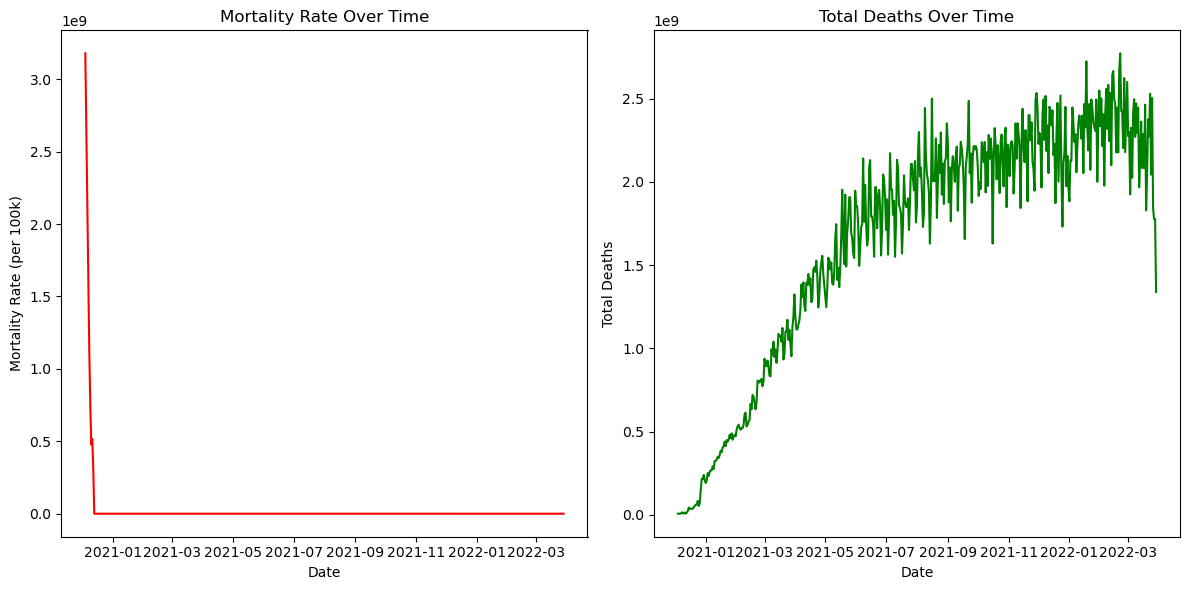

In [90]:
# Plot total deaths and mortality rate separately
plt.figure(figsize=(12, 6))

# Plot Mortality Rate over time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(daily_data['date'], daily_data['mortality_rate'], label='Mortality Rate', color='red')
plt.xlabel('Date')
plt.ylabel('Mortality Rate (per 100k)')
plt.title('Mortality Rate Over Time')

# Plot Total Deaths over time
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(daily_data['date'], daily_data['total_deaths'], label='Total Deaths', color='green')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total Deaths Over Time')

plt.tight_layout()
plt.show()